In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
df = pd.read_csv("books.csv",on_bad_lines = "skip")

In [19]:
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [19]:
df.shape


(11123, 12)

In [23]:
df.columns = df.columns.str.strip()#strip removes the spaces in column names

In [25]:
df.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', 'num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')

In [13]:
#feature engineering
df.isbn.nunique()

11123

In [19]:
df.isbn13.nunique()

11123

In [25]:
df.drop(["bookID","isbn","isbn13"],axis = 1,inplace = True)

In [29]:
df.head()

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,eng,352,6333,244,11/1/2003,Scholastic
3,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,eng,2690,41428,164,9/13/2004,Scholastic


In [39]:
df['year'] = df['publication_date'].str.split('/')
df['year'] = df['year'].apply(lambda x : x[2])

In [41]:
df.head()

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,year
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,2006
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,2004
2,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,eng,352,6333,244,11/1/2003,Scholastic,2003
3,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,2004
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,eng,2690,41428,164,9/13/2004,Scholastic,2004


In [43]:
df.dtypes

title                  object
authors                object
average_rating        float64
language_code          object
  num_pages             int64
ratings_count           int64
text_reviews_count      int64
publication_date       object
publisher              object
year                   object
dtype: object

In [51]:
df['year'] = df['year'].astype(int)

In [53]:
df.dtypes

title                  object
authors                object
average_rating        float64
language_code          object
  num_pages             int64
ratings_count           int64
text_reviews_count      int64
publication_date       object
publisher              object
year                    int64
dtype: object

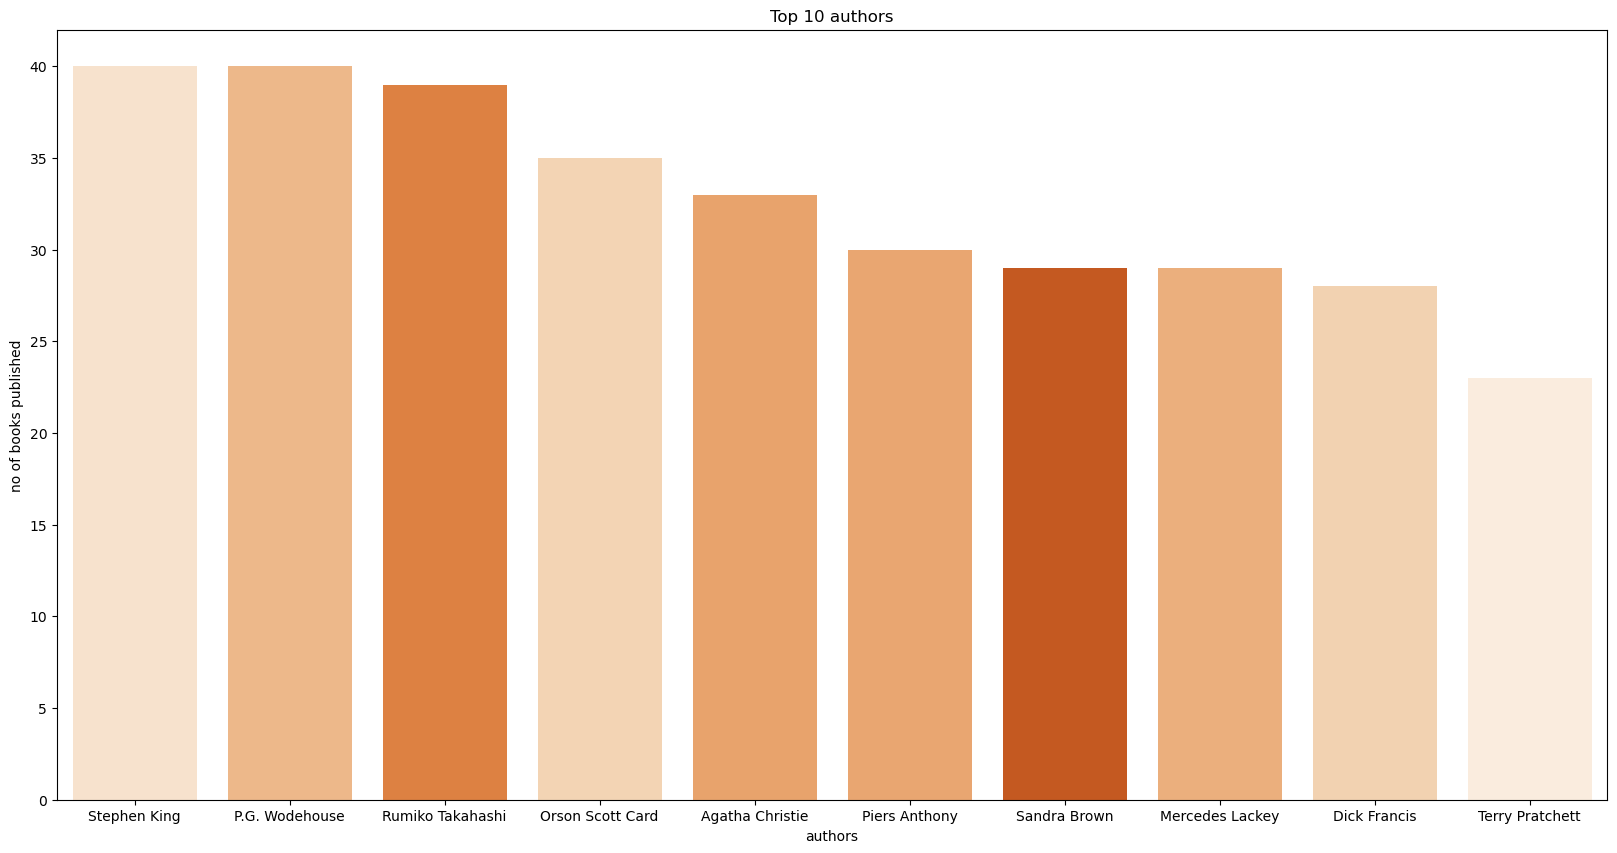

In [154]:
#Data Visualisation
plt.figure(figsize = (20,10))
sns.countplot(x = 'authors',data = df,order = df['authors'].value_counts().iloc[:10].index , hue='authors', palette='Oranges')
plt.title("Top 10 authors")
plt.ylabel("no of books published")
plt.show()

In [84]:
df.language_code.value_counts()

language_code
eng      8908
en-US    1408
spa       218
en-GB     214
fre       144
ger        99
jpn        46
mul        19
zho        14
grc        11
por        10
en-CA       7
ita         5
enm         3
lat         3
swe         2
rus         2
srp         1
nl          1
msa         1
glg         1
wel         1
ara         1
nor         1
tur         1
gla         1
ale         1
Name: count, dtype: int64

In [160]:

result = df.groupby(["language_code"])[["average_rating", "ratings_count", "text_reviews_count"]].agg('mean')

styled_result = result.style.background_gradient(cmap='coolwarm')

styled_result


,average_rating,ratings_count,text_reviews_count
language_code,,,
ale,4.360000,102.000000,16.000000
ara,3.550000,122.000000,12.000000
en-CA,4.025714,4086.714286,324.428571
en-GB,3.923411,2463.691589,104.060748
en-US,3.914659,3773.906960,160.357244
eng,3.934062,21570.272564,645.156601
enm,3.873333,3233.666667,84.000000
fre,3.971528,3277.319444,64.513889
ger,3.950101,234.727273,8.232323


In [132]:
book = df['title'].value_counts()[:20]
print(book.index)

Index(['The Iliad', 'The Brothers Karamazov', 'The Odyssey', 'Anna Karenina',
       ''Salem's Lot', 'Gulliver's Travels', 'The Picture of Dorian Gray',
       'A Midsummer Night's Dream', 'The Histories', 'Macbeth',
       'Sense and Sensibility', 'Robinson Crusoe', 'Treasure Island',
       'Jane Eyre', 'Romeo and Juliet', 'Collected Stories',
       'The Secret Garden', 'The Scarlet Letter', 'The Great Gatsby',
       'Frankenstein'],
      dtype='object', name='title')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'The Iliad'),
  Text(1, 0, 'The Brothers Karamazov'),
  Text(2, 0, 'The Odyssey'),
  Text(3, 0, 'Anna Karenina'),
  Text(4, 0, "'Salem's Lot"),
  Text(5, 0, "Gulliver's Travels"),
  Text(6, 0, 'The Picture of Dorian Gray'),
  Text(7, 0, "A Midsummer Night's Dream"),
  Text(8, 0, 'The Histories'),
  Text(9, 0, 'Macbeth'),
  Text(10, 0, 'Sense and Sensibility'),
  Text(11, 0, 'Robinson Crusoe'),
  Text(12, 0, 'Treasure Island'),
  Text(13, 0, 'Jane Eyre'),
  Text(14, 0, 'Romeo and Juliet'),
  Text(15, 0, 'Collected Stories'),
  Text(16, 0, 'The Secret Garden'),
  Text(17, 0, 'The Scarlet Letter'),
  Text(18, 0, 'The Great Gatsby'),
  Text(19, 0, 'Frankenstein')])

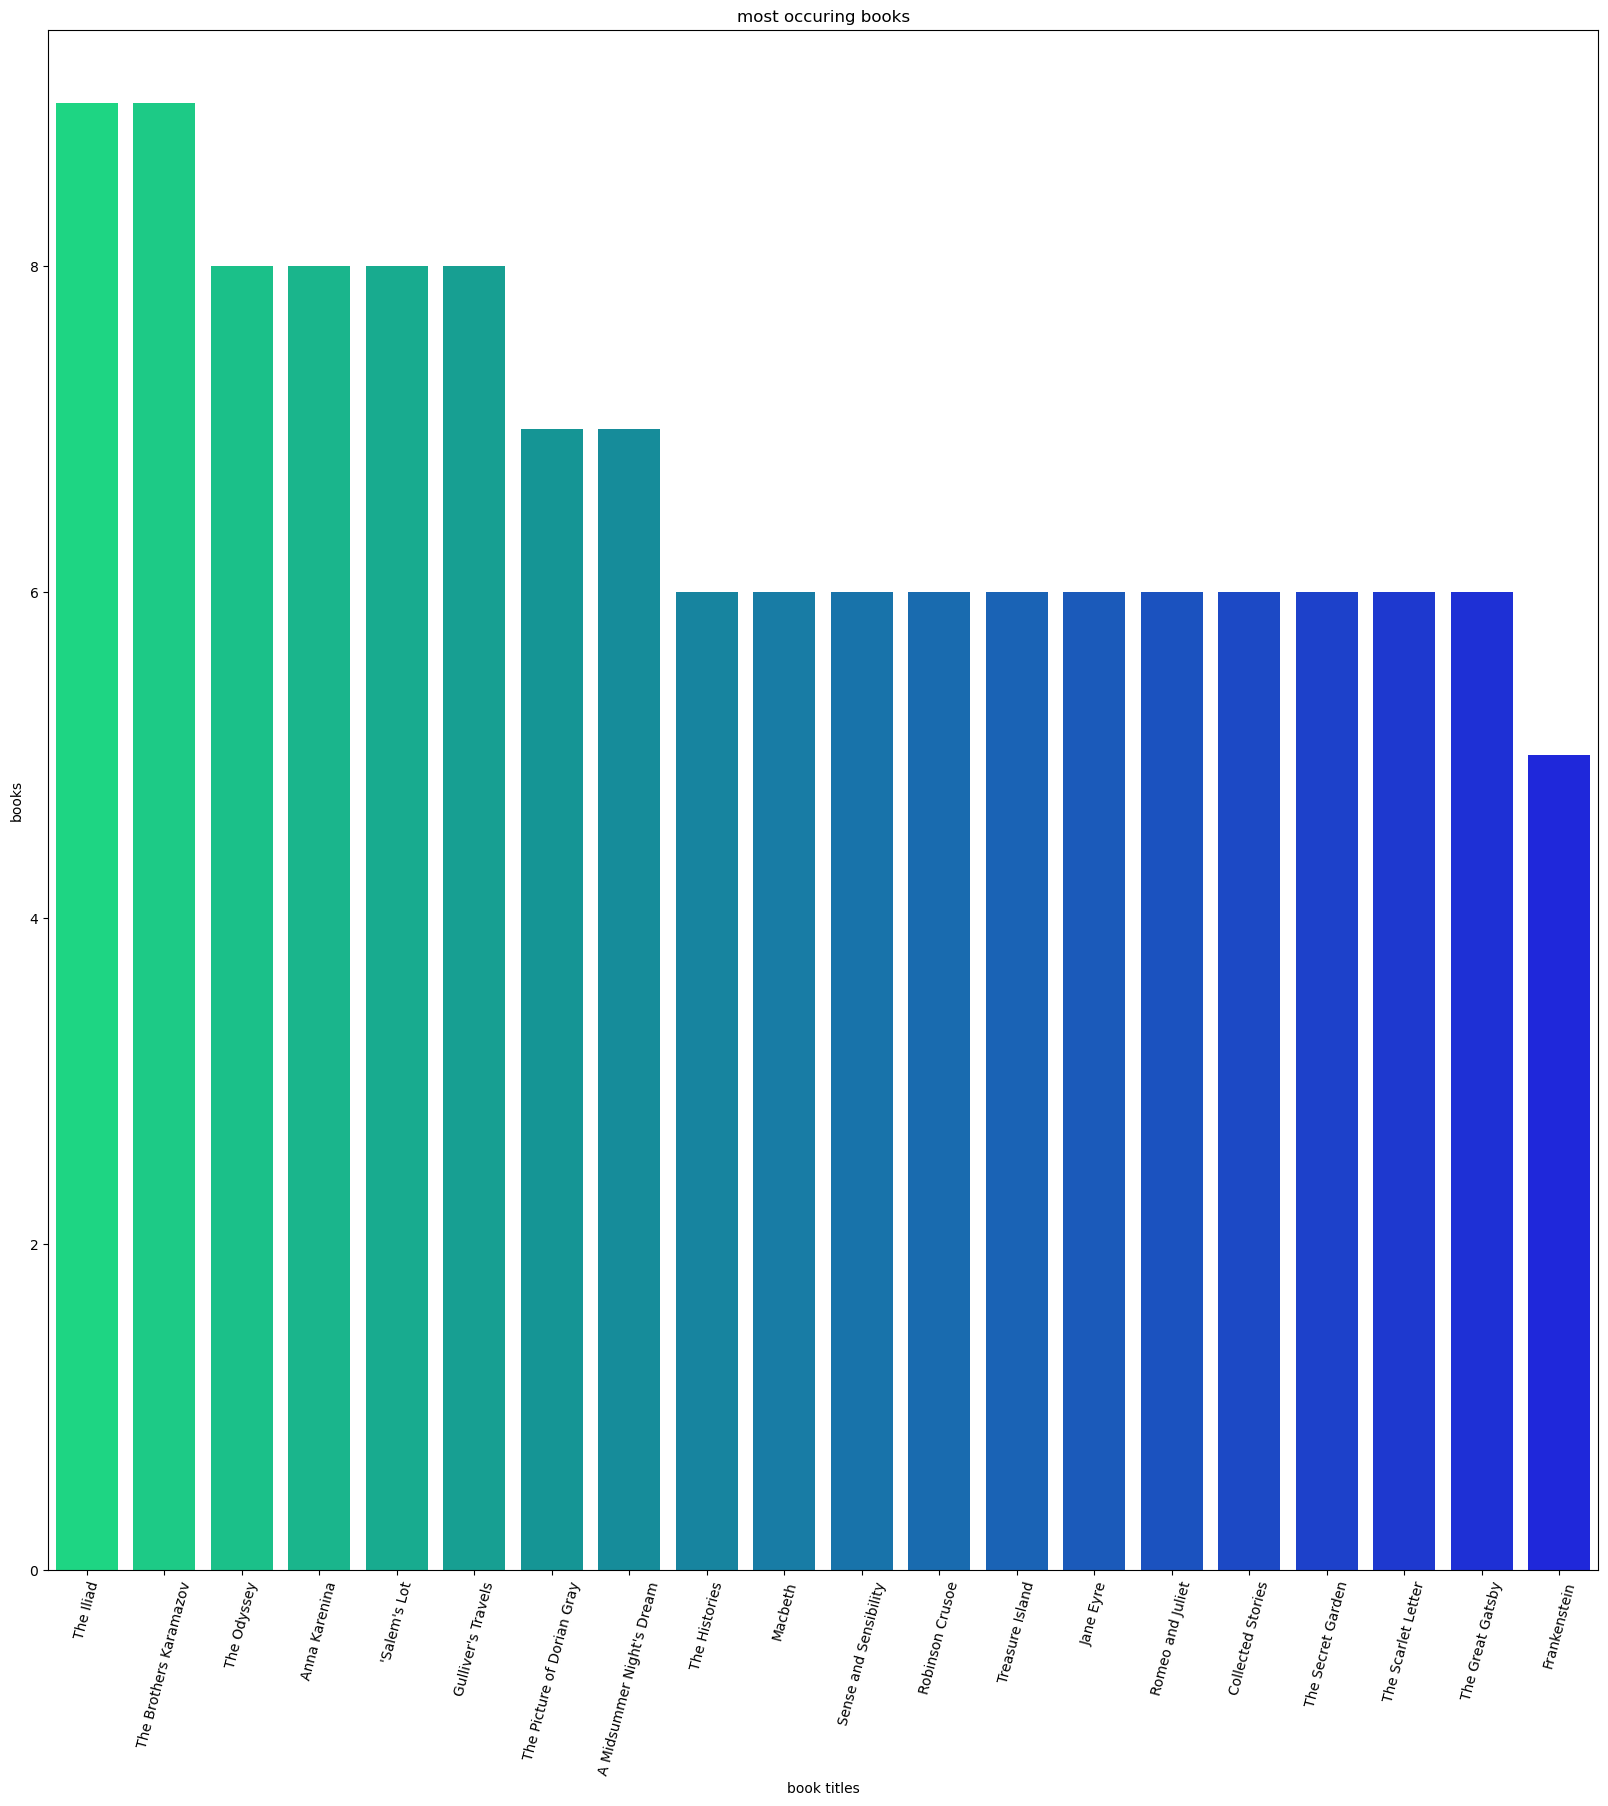

In [164]:
plt.figure(figsize = (20,20))
sns.barplot(x = book.index , y = book,hue = book.index ,palette = "winter_r")
plt.title("most occuring books")
plt.xlabel("book titles")
plt.ylabel("books")
plt.xticks(rotation = 75)

In [174]:
df[df["average_rating"]==df["average_rating"].max()][['title','authors','language_code','publisher']]

,title,authors,language_code,publisher
624,Comoediae 1: Acharenses/Equites/Nubes/Vespae/P...,Aristophanes/F.W. Hall/W.M. Geldart,grc,Oxford University Press USA
786,Willem de Kooning: Late Paintings,Julie Sylvester/David Sylvester,eng,Schirmer Mosel
855,Literature Circle Guide: Bridge to Terabithia:...,Tara MacCarthy,eng,Teaching Resources
1243,Middlesex Borough (Images of America: New Jersey),Middlesex Borough Heritage Committee,eng,Arcadia Publishing
4125,Zone of the Enders: The 2nd Runner Official St...,Tim Bogenn,eng,BradyGames
4788,The Diamond Color Meditation: Color Pathway to...,John Diamond,eng,Square One Publishers
4933,Bulgakov's the Master and Margarita: The Text ...,Elena N. Mahlow,eng,Vantage Press
5023,The Complete Theory Fun Factory: Music Theory ...,Ian Martin/Katie Elliott,eng,Boosey & Hawkes Inc
5474,The Goon Show Volume 4: My Knees Have Fallen ...,NOT A BOOK,eng,BBC Physical Audio
5476,The Goon Show Volume 11: He's Fallen in the W...,NOT A BOOK,eng,BBC Physical Audio


In [182]:
df.columns

Index(['title', 'authors', 'average_rating', 'language_code', '  num_pages',
       'ratings_count', 'text_reviews_count', 'publication_date', 'publisher',
       'year'],
      dtype='object')

In [196]:
#books recommended by publisher
def book_reccom_publisher(x):
    a = df[df['publisher'] == x][['title','average_rating']]
    a = a.sort_values(by = 'average_rating',ascending = False)
    return a.head(10)

In [198]:
book_reccom_publisher('Vintage')

,title,average_rating
7371,Remembrance of Things Past: Volume II - The Gu...,4.53
335,The Power Broker: Robert Moses and the Fall of...,4.51
10838,The Civil War Vol. 1: Fort Sumter to Perryville,4.42
1775,The Son Avenger (The Master of Hestviken #4),4.40
1505,A Fine Balance,4.36
9626,Nobody Knows My Name,4.35
2267,The Stories of Vladimir Nabokov,4.30
3112,All of Us: The Collected Poems,4.30
8787,Selected Stories,4.28
4019,Selected Stories,4.28


In [21]:
from ipywidgets import interact, widgets
from IPython.display import display

@interact
def book_reccom_publishers(publisher_name=list(df["publisher"].value_counts().index)):
    a = df[df['publisher'] == publisher_name][['title', 'average_rating']]
    a = a.sort_values(by='average_rating', ascending=False)
    display(a.head(10))  # Ensure display is explicitly called



interactive(children=(Dropdown(description='publisher_name', options=('Vintage', 'Penguin Books', 'Penguin Cla…

In [214]:
def num_to_obj(x):
    if x > 0 and x <=1 :
        return "between 0 and 1"
    if x > 1 and x <=2 :
        return "between 1 and 2"
    if x > 2 and x <=3 :
        return "between 2 and 3"
    if x > 3 and x <=4 :
        return "between 3 and 4"
    if x > 4 and x <=5 :
        return "between 4 and 5"

In [218]:
df["rating_obj"] = df['average_rating'].apply(num_to_obj)

In [222]:
df["rating_obj"].value_counts()

rating_obj
between 3 and 4    6285
between 4 and 5    4735
between 2 and 3      69
between 1 and 2       7
between 0 and 1       2
Name: count, dtype: int64

In [226]:
df_rating = pd.get_dummies(df['rating_obj'])
df_rating.head(10)

,between 0 and 1,between 1 and 2,between 2 and 3,between 3 and 4,between 4 and 5
0,False,False,False,False,True
1,False,False,False,False,True
2,False,False,False,False,True
3,False,False,False,False,True
4,False,False,False,False,True
5,False,False,False,True,False
6,False,False,False,False,True
7,False,False,False,False,True
8,False,False,False,False,True
9,False,False,False,False,True


In [228]:
df_language = pd.get_dummies(df['language_code'])
df_language.head(10)

,ale,ara,en-CA,en-GB,en-US,eng,enm,fre,ger,gla,...,nl,nor,por,rus,spa,srp,swe,tur,wel,zho
0,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [230]:
df.columns

Index(['title', 'authors', 'average_rating', 'language_code', '  num_pages',
       'ratings_count', 'text_reviews_count', 'publication_date', 'publisher',
       'year', 'rating_obj'],
      dtype='object')

In [240]:
features = pd.concat([df_rating,df_language,df['title'],df['average_rating'],df['ratings_count']],axis = 1)
features.set_index("title",inplace = True)
features

,between 0 and 1,between 1 and 2,between 2 and 3,between 3 and 4,between 4 and 5,ale,ara,en-CA,en-GB,en-US,...,por,rus,spa,srp,swe,tur,wel,zho,average_rating,ratings_count
title,,,,,,,,,,,,,,,,,,,,,
Harry Potter and the Half-Blood Prince (Harry Potter #6),False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,4.57,2095690
Harry Potter and the Order of the Phoenix (Harry Potter #5),False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,4.49,2153167
Harry Potter and the Chamber of Secrets (Harry Potter #2),False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,4.42,6333
Harry Potter and the Prisoner of Azkaban (Harry Potter #3),False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,4.56,2339585
Harry Potter Boxed Set Books 1-5 (Harry Potter #1-5),False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,4.78,41428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Expelled from Eden: A William T. Vollmann Reader,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,4.06,156
You Bright and Risen Angels,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,4.08,783
The Ice-Shirt (Seven Dreams #1),False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,3.96,820


In [248]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
feature_scaled = scaler.fit_transform(features)
feature_scaled

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 9.14000000e-01, 4.55816060e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 8.98000000e-01, 4.68317403e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 8.84000000e-01, 1.37743803e-03],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 7.92000000e-01, 1.78351363e-04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 7.44000000e-01, 1.67258779e-04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 7.82000000e-01, 2.45776879e-05]])

In [250]:
from sklearn import neighbors 


In [262]:
model = neighbors.NearestNeighbors(n_neighbors = 5,algorithm = "ball_tree",metric = "euclidean")
model.fit(feature_scaled)

NearestNeighbors(algorithm='ball_tree', metric='euclidean')

In [23]:
dist,idlist = model.kneighbors(feature_scaled)

NameError: name 'model' is not defined

In [25]:
@interact
def BookRecommender(book_name = list(df['title'].value_counts().index)):
    book_list_name = []
    book_id = df[df['title'] == book_name].index
    book_id = book_id[0]
    for new_id in idlist[book_id]:
        book_list_name.append(df.loc[new_id].title)
    return book_list_name

interactive(children=(Dropdown(description='book_name', options=('The Iliad', 'The Brothers Karamazov', 'The O…